Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиумные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
user_data.head(2)

,client,premium,age
0,46346,False,58
1,4391,False,55


In [4]:
logs_data = pd.read_csv('/home/jupyter-a.komova-13/lesson_3/3_logs.csv')

In [5]:
logs_data.head(2)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658


In [6]:
data = logs_data \
    .merge(user_data, how = 'outer', on='client')

In [7]:
data.head(5)

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,61468,True,computer,1585460504,False,25.0
3,61468,True,computer,1585430291,False,25.0
4,61468,True,computer,1585444317,False,25.0


In [8]:
data.value_counts('platform')

platform
phone       2753
computer    1505
tablet       242
dtype: int64

Сколько уникальных значений принимает переменная platform?

In [9]:
data.platform.nunique()

3

In [10]:
data.isna()

,client,success,platform,time,premium,age
0,False,False,False,False,True,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4495,False,False,False,False,False,False
4496,False,False,False,False,True,True
4497,False,False,False,False,False,False
4498,False,False,False,False,True,True


In [11]:
data.isna().sum()

client         0
success        0
platform       0
time           0
premium     1061
age         1061
dtype: int64

Какой клиент совершил больше всего успешных операций?

In [13]:
success_number = data.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'platform' : 'count'}) \
    .rename(columns = {'platform' : 'success_number'}) \
    .sort_values('success_number', ascending = False)

In [14]:
success_number

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [15]:
max_success_number = success_number.success_number.max()

In [16]:
max_success_number

41

In [17]:
success_number.query('success_number == @max_success_number') \
    .sort_values('client') \
    .client \
    .tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [18]:
best_platform = data.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'client' : 'count'}) \
    .rename(columns = {'client' : 'success_number'}) \
    .sort_values('success_number', ascending = False) 

In [19]:
best_platform

,platform,success_number
1,phone,2019
0,computer,1090
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [20]:
best_platform_premium = data.query('success == True and premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'client' : 'count'}) \
    .rename(columns = {'client' : 'success_number'}) \
    .sort_values('success_number', ascending = False) 

In [21]:
best_platform_premium

,platform,success_number
1,phone,177
0,computer,108
2,tablet,18


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. 

In [23]:
best_platform_premium2 = data.query('premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'client' : 'count'}) \
    .rename(columns = {'client' : 'success_number'}) \
    .sort_values('success_number', ascending = False)

In [24]:
best_platform_premium2

,platform,success_number
1,phone,246
0,computer,150
2,tablet,24


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


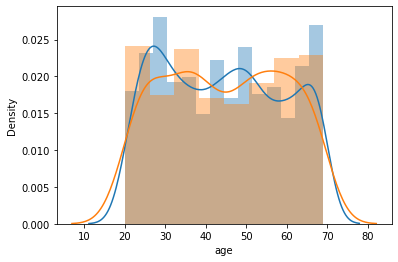

In [25]:
ax = sns.distplot(data.query('premium == False').age)
ax = sns.distplot(data.query('premium == True').age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


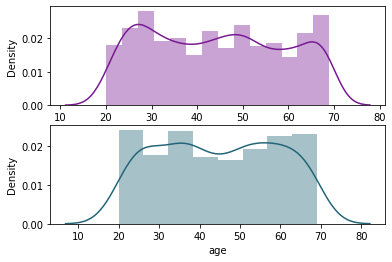

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)

sns.distplot(data.query('premium == False').age, ax=ax[0], color='#771991')
sns.distplot(data.query('premium == True').age, ax=ax[1], color='#226577')

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

In [27]:
success_number

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


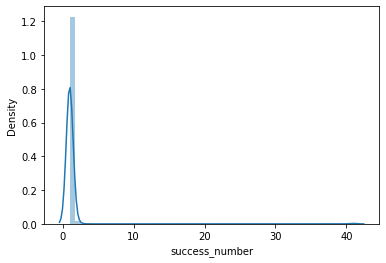

In [28]:
ax = sns.distplot(success_number.success_number)

In [29]:
success_number.success_number.value_counts()

1     2791
2       43
41       9
3        1
40       1
Name: success_number, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. Клиенты какого возраста совершили наибольшее количество успешных действий?

In [30]:
computer_operations = data.query('success == True and platform == "computer"') \
    .groupby('age', as_index = False) \
    .agg({'client' : 'count'}) \
    .rename(columns = {'client' : 'success_number'}) \
    .sort_values('success_number', ascending = False) 

In [32]:
computer_operations.head(5)

,age,success_number
8,28.0,49
29,49.0,33
5,25.0,33
12,32.0,27
48,68.0,26


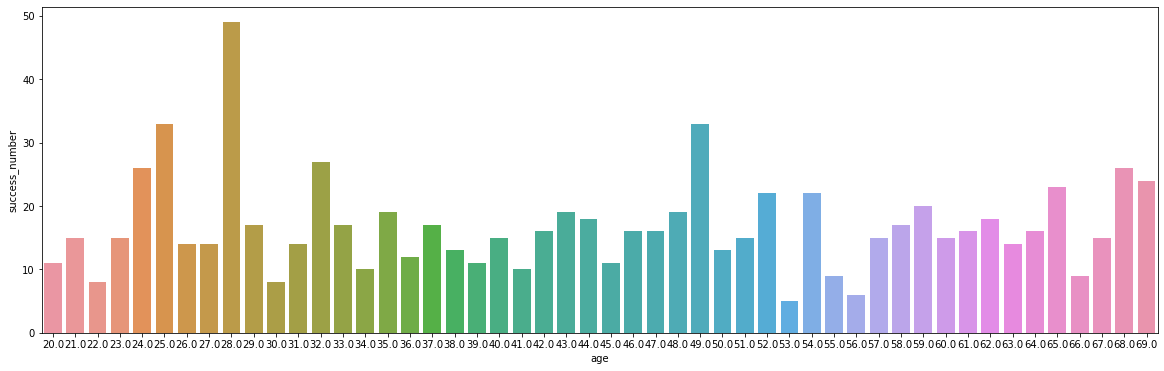

In [33]:
plt.figure(figsize=[20,6])
ax = sns.barplot(x="age", y="success_number", data=computer_operations)

In [34]:
data.head(5)

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,61468,True,computer,1585460504,False,25.0
3,61468,True,computer,1585430291,False,25.0
4,61468,True,computer,1585444317,False,25.0


In [35]:
computer_success2 = data.query('success == True and platform == "computer"')

In [36]:
computer_success2

,client,success,platform,time,premium,age
2,61468,True,computer,1585460504,False,25.0
3,61468,True,computer,1585430291,False,25.0
4,61468,True,computer,1585444317,False,25.0
8,61468,True,computer,1585416826,False,25.0
12,61468,True,computer,1585428874,False,25.0
...,...,...,...,...,...,...
4484,95135,True,computer,1585456336,NaN,NaN
4488,68031,True,computer,1585464203,NaN,NaN
4490,85769,True,computer,1585447052,False,46.0
4492,81031,True,computer,1585401631,False,45.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


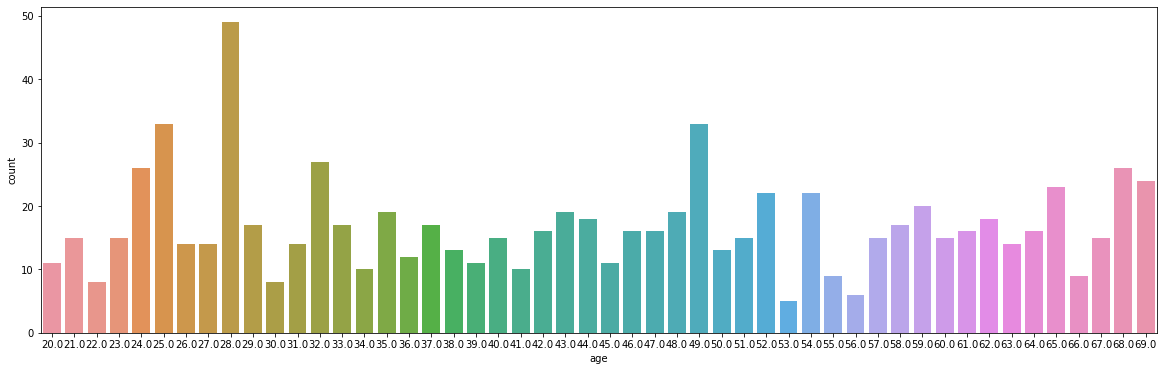

In [37]:
plt.figure(figsize=[20,6])
sns.countplot(computer_success2.age)